# Executive Summary

# High Level Goal

Your team has been hired to provide research for a political campaign. They have obtained a dataset of crime statistics for a selection of counties in North Carolina.

Your task is to examine the data to help the campaign understand the determinants of crime and to generate policy suggestions that are applicable to local government.

My Takeaway: Fundamentally, our goal is to
* A. _help understand the determinants of crime_
* B. _make informed policy suggestions accordingly_

_A_ will be a statistical task, and doing _B_ will be require us to wear socio-political hats. Presumably, the interest of our audience, a political campaign is to pitch itself to the public for election using informed policy ideas for _reducing_ crime.

In order to A, we must identify a measurable proxy for crime. I think that the most natural choice for this is the variable `crmrte` giving the crimes committed per person.


In [17]:
# Load the data
crime <- read.csv('crime_v2.csv')

## Exploratory Cleaning

Checking for missing values.

In [18]:
summary(is.na(crime))

   county           year           crmrte          prbarr       
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:91        FALSE:91        FALSE:91        FALSE:91       
 TRUE :6         TRUE :6         TRUE :6         TRUE :6        
  prbconv         prbpris          avgsen          polpc        
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:97        FALSE:91        FALSE:91        FALSE:91       
                 TRUE :6         TRUE :6         TRUE :6        
  density          taxpc            west          central       
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:91        FALSE:91        FALSE:91        FALSE:91       
 TRUE :6         TRUE :6         TRUE :6         TRUE :6        
   urban          pctmin80          wcon            wtuc        
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:91        FALSE:91        FALSE:91        FALSE:91       
 TRUE :6         TRUE :6 

The output of the summary of missing values reveals that every column has precisely 6 missing values.

In [19]:
crime[91:nrow(crime), ]
paste0("Number of missing values in first 92 rows: ", sum(is.na(crime[1:91, ])))

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
,<int>,<int>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
91,197,87,0.0141928,0.207595,1.182929993,0.360825,12.23,0.00118573,0.889881,25.95258,⋯,341.8803,182.802,348.1432,212.8205,322.92,391.72,385.65,306.85,0.06756757,0.07419893
92,NA,NA,NA,NA,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
93,NA,NA,NA,NA,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
94,NA,NA,NA,NA,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
95,NA,NA,NA,NA,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
96,NA,NA,NA,NA,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
97,NA,NA,NA,NA,`,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


[1] "Number of missing values in first 92 rows: 0"

The last 6 rows are filled exclusively with `NA`s, while all the rows up to and including the 91st contain no missing values. Therefore, will omit the existing `NA`s with no loss of important information. 

In [20]:
crime <- na.omit(crime)

Now, we will have a quick look at the variables data types.

In [21]:
str(crime)

'data.frame':	91 obs. of  25 variables:
 $ county  : int  1 3 5 7 9 11 13 15 17 19 ...
 $ year    : int  87 87 87 87 87 87 87 87 87 87 ...
 $ crmrte  : num  0.0356 0.0153 0.013 0.0268 0.0106 ...
 $ prbarr  : num  0.298 0.132 0.444 0.365 0.518 ...
 $ prbconv : Factor w/ 92 levels "","`","0.068376102",..: 63 89 13 62 52 3 59 78 42 86 ...
 $ prbpris : num  0.436 0.45 0.6 0.435 0.443 ...
 $ avgsen  : num  6.71 6.35 6.76 7.14 8.22 ...
 $ polpc   : num  0.001828 0.000746 0.001234 0.00153 0.00086 ...
 $ density : num  2.423 1.046 0.413 0.492 0.547 ...
 $ taxpc   : num  31 26.9 34.8 42.9 28.1 ...
 $ west    : int  0 0 1 0 1 1 0 0 0 0 ...
 $ central : int  1 1 0 1 0 0 0 0 0 0 ...
 $ urban   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pctmin80: num  20.22 7.92 3.16 47.92 1.8 ...
 $ wcon    : num  281 255 227 375 292 ...
 $ wtuc    : num  409 376 372 398 377 ...
 $ wtrd    : num  221 196 229 191 207 ...
 $ wfir    : num  453 259 306 281 289 ...
 $ wser    : num  274 192 210 257 215 ...
 $ wmfg    : num  33

All of the variables in this dataset aside are conceptually numeric, but the probabilty of conviction, `prbarr` has been inferred as a factor. Therefore, it is necessary to cast it as a numeric variable.

In [22]:
crime$prbconv <- as.numeric(crime$prbconv)

Additionally, we will remove the `county` and `year` because `year` is a constant, and the counties' unique nnumerical identifiers will not be relevant to any analysis.

In [23]:
crime <- crime[!names(crime) %in% c('year', 'county')]

Lastly, we will take a look at the variable summaries to see whether the data is within normal bounds.

In [24]:
summary(crime)

     crmrte             prbarr           prbconv         prbpris      
 Min.   :0.005533   Min.   :0.09277   Min.   : 3.00   Min.   :0.1500  
 1st Qu.:0.020927   1st Qu.:0.20568   1st Qu.:25.50   1st Qu.:0.3648  
 Median :0.029986   Median :0.27095   Median :48.00   Median :0.4234  
 Mean   :0.033400   Mean   :0.29492   Mean   :47.75   Mean   :0.4108  
 3rd Qu.:0.039642   3rd Qu.:0.34438   3rd Qu.:70.00   3rd Qu.:0.4568  
 Max.   :0.098966   Max.   :1.09091   Max.   :92.00   Max.   :0.6000  
     avgsen           polpc              density            taxpc       
 Min.   : 5.380   Min.   :0.0007459   Min.   :0.00002   Min.   : 25.69  
 1st Qu.: 7.340   1st Qu.:0.0012308   1st Qu.:0.54741   1st Qu.: 30.66  
 Median : 9.100   Median :0.0014853   Median :0.96226   Median : 34.87  
 Mean   : 9.647   Mean   :0.0017022   Mean   :1.42884   Mean   : 38.06  
 3rd Qu.:11.420   3rd Qu.:0.0018768   3rd Qu.:1.56824   3rd Qu.: 40.95  
 Max.   :20.700   Max.   :0.0090543   Max.   :8.82765   Max.   :1

While most of the data appears within normal bounds, it comes to our attention that some of the probability varialbles, namely `prbarr` and `prbconv`, are outside of expected bounds. There summaries are as follows:


In [25]:
print('Probaility of arrest summary:')
summary(crime$prbarr)
print('Probability of conviction')
summary(crime$prbconv)

[1] "Probaility of arrest summary:"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.09277 0.20568 0.27095 0.29492 0.34438 1.09091 

[1] "Probability of conviction"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3.00   25.50   48.00   47.75   70.00   92.00 

All counties probability of conviction values are bounded between 0 and 100, so we speculate that these numbers are percentages, and not probabilities. Thus, we will transform `prbconv` by scaling it by $1/100$.

In [26]:
crime$prbconv <- 1.0/100 * crime$prbconv

Additionally, while most of the probability of arrest values are between 0 and 1, the maximum values of the column is 1.09, outside the bounds of a probability. Thus will will have a closer look at the distribtion of `prbconv`.

[1] "Number of values greater than 1: 1"

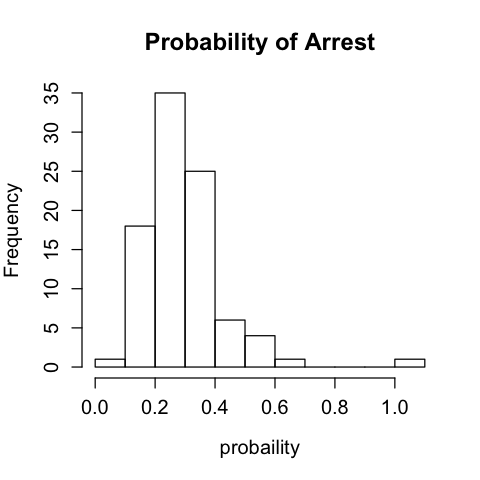

In [27]:
options(repr.plot.height = 4, repr.plot.width = 4, repr.plot.pointsize = 10)
hist(crime$prbarr, main = 'Probability of Arrest', xlab='probaility')
paste0('Number of values greater than 1: ', sum(crime$prbarr > 1.0))

Since there is only one probability value greater than 1, we speculate that it is the result of a mistranscription, in which the data collecter input `1.09` instead of the intended `0.09`. Thus we will go ahead and change the value accordingly.

In [28]:
crime$prbarr[crime$prbarr > 1.0] <- crime$prbarr[crime$prbarr > 1.0] - 1 

# Intended Models

## Model 1: 
$crmrte = \beta_0 + \beta_1log(density + 1) + \beta_2polpc + \beta_3wfed + e$

The first model will regresses crime rate (`crmrate`) on log-density (`density`), police per capita (`polpc`) and federal wage (`wfed`). We consider density, police per capita and federal wage the key explanatory variables of interest.

*  `density`
    * description: Average number of people per square mile in a given county.
    * range: `[0.00002, 8.83]`
    
* `polpc`
    * description: Police per capita in a given county.
    * range: `[0.00075, 0.0091]`
* `wfed`
    * description: Average weekly wage of Federal employees in a given county.
    * range: `[326.1, 598.0]`
    
The exploratory analysis supporting this choice of variables in this baseline model will now follow:

#### Spearman Correlations with Crime Rate

In [30]:
round(cor(crime, method = 'spearman'), 2)[, 'crmrte']

crmrte   prbarr  prbconv  prbpris   avgsen    polpc  density    taxpc 
    1.00    -0.28    -0.35     0.00     0.09     0.53     0.66     0.22 
    west  central    urban pctmin80     wcon     wtuc     wtrd     wfir 
   -0.40     0.19     0.45     0.29     0.38     0.21     0.32     0.21 
    wser     wmfg     wfed     wsta     wloc      mix  pctymle 
    0.31     0.46     0.53     0.11     0.37     0.03     0.34

The variables `density`, `urban`, `polpc` and `wfed`, which represent people per square mile, an indicator for an urban county, police per capita and the average weekly wage of federal employees, respectively, have the highest spearman correlations with crime rate in magnitude. This result suggests that some of these variables could be the key derminants of crime rate while the others important variables to control for when understanding crime.

In [33]:
print('Covariance of density, urban, polpc and wfed: ')
round(cor(crime[,c('density', 'urban', 'polpc', 'wfed')]), 2)

[1] "Covariance of density, urban, polpc and wfed: "


,density,urban,polpc,wfed
density,1.00,0.82,0.16,0.59
urban,0.82,1.00,0.16,0.42
polpc,0.16,0.16,1.00,0.16
wfed,0.59,0.42,0.16,1.00



The strong correlation between `urban` and `density` is unsurprising because urban cities are dense clusters of people. As such, we will not include `density` in the baseline model as it does not offer much information that isn't already provided by `density`. Thus the key explanatory variables to be included in the baseline model are:
* `density`
* `polpc`
* `wfed`

In an effort to optimize our baseline model, we will check to see whether the relationship between crime rate and any of the key explanatory variables appears linear or is best represnted using a transformation.

### Explaining Crime Rate and Key Explanatory Variables

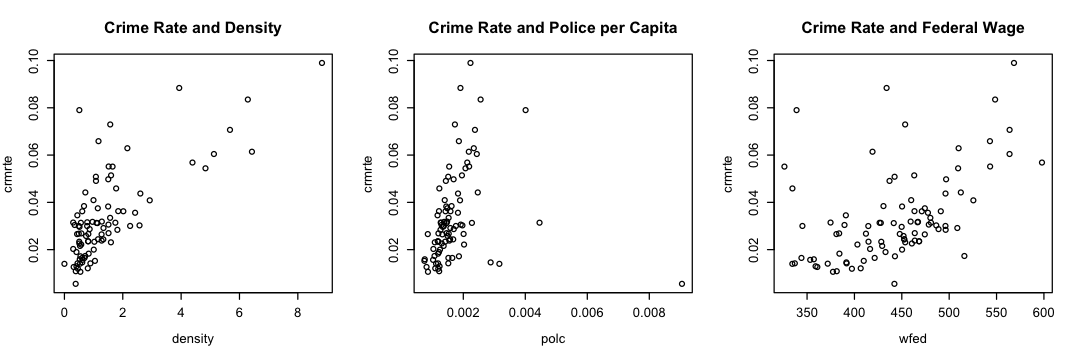

In [36]:
options(repr.plot.height = 3, repr.plot.width = 9, repr.plot.pointsize = 10)
par(mfrow = c(1, 3))
plot(crime[,'density'], crime[,'crmrte'], xlab = 'density', ylab = 'crmrte', main='Crime Rate and Density')
plot(crime[, 'polpc'], crime[,'crmrte'], xlab = 'polc', ylab = 'crmrte',  main='Crime Rate and Police per Capita')
plot(crime[,'wfed'], crime[,'crmrte'], xlab = 'wfed', ylab = 'crmrte',  main='Crime Rate and Federal Wage')

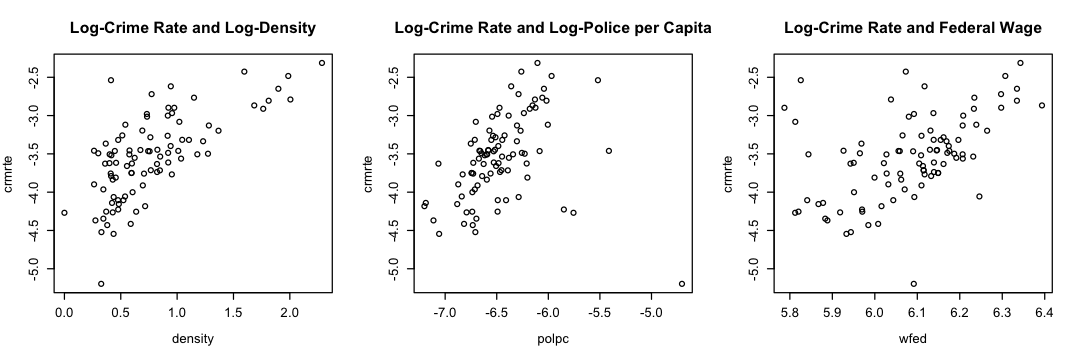

In [69]:
options(repr.plot.height = 3, repr.plot.width = 9, repr.plot.pointsize = 10)
par(mfrow = c(1, 3))
plot(log(crime[,'density'] + 1), log(crime[,'crmrte']), xlab = 'density', ylab = 'crmrte',  
     main='Log-Crime Rate and Log-Density')
plot(log(crime[, 'polpc']), log(crime[,'crmrte']), xlab = 'polpc', ylab = 'crmrte', 
     main='Log-Crime Rate and Log-Police per Capita')
plot(log(crime[,'wfed']), log(crime[,'crmrte']), xlab = 'wfed', ylab = 'crmrte', 
     main='Log-Crime Rate and Federal Wage')

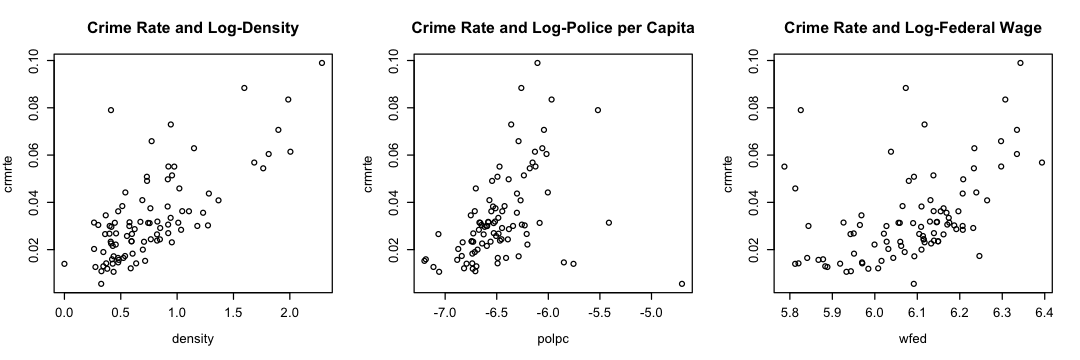

In [55]:
options(repr.plot.height = 3, repr.plot.width = 9, repr.plot.pointsize = 10)
par(mfrow = c(1, 3))
plot(log(crime[,'density'] + 1), crime[,'crmrte'], xlab = 'density', ylab = 'crmrte', 
    main = 'Crime Rate and Log-Density')
plot(log(crime[, 'polpc']), crime[,'crmrte'], xlab = 'polpc', ylab = 'crmrte',
    main = 'Crime Rate and Log-Police per Capita')
plot(log(crime[,'wfed']), crime[,'crmrte'], xlab = 'wfed', ylab = 'crmrte', 
     main='Crime Rate and Log-Federal Wage')

After examination of the log transformations, we decide that we will regress crime rate on the log tranformation of density: $density \to log(density + 1)$ because it's relationship with crime appears to most linear. Moreover, we shifted density by 1 because some of the density values are less than 1.

In [70]:
# adding log density as a variable
crime$log.density <- log(crime$density + 1)

## Fitting Model 1

In [72]:
model.1 <- lm(crmrte ~ log.density + polpc + wfed, data = crime)

With the `polpc` outlier included, we observe the following baseline model results:

In [73]:
summary(model.1)


Call:
lm(formula = crmrte ~ log.density + polpc + wfed, data = crime)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.025155 -0.008605 -0.002926  0.007159  0.052984 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.825e-03  1.181e-02   0.663    0.509    
log.density  3.056e-02  4.103e-03   7.448 6.47e-11 ***
polpc        1.467e+00  1.406e+00   1.043    0.300    
wfed        -8.832e-07  3.070e-05  -0.029    0.977    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01299 on 87 degrees of freedom
Multiple R-squared:  0.539,	Adjusted R-squared:  0.5231 
F-statistic: 33.91 on 3 and 87 DF,  p-value: 1.302e-14


Obervations:
* The model explains approximately 52% of the variance in the data.
* `density` is the only significant predictor at the 5% significance level. 

#### Model 1 Diagnostic Plots

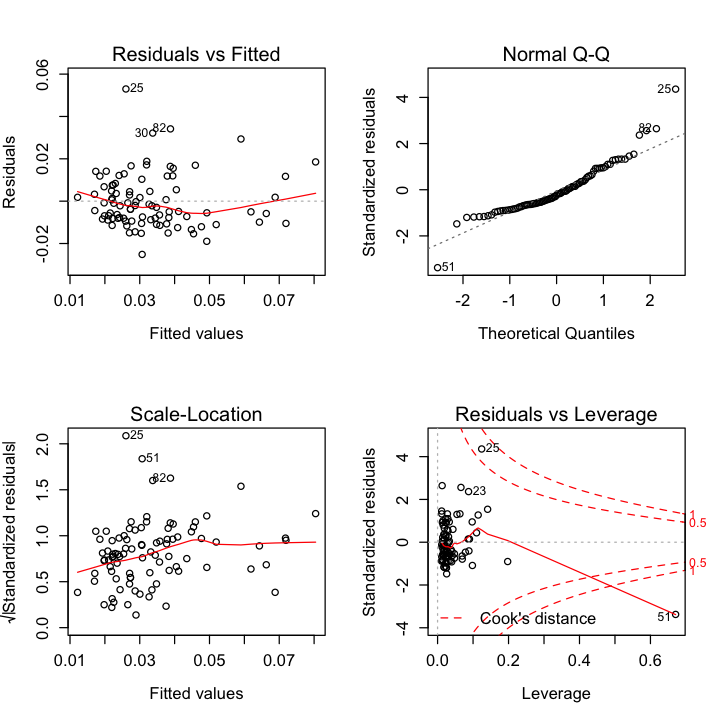

In [57]:
options(repr.plot.height = 6, repr.plot.width = 6, repr.plot.pointsize = 10)
par(mfrow = c(2,2))
plot(model.1)

Observations:
1. The parabolic shape of the splice curve in the residual vs fitted plot suggest that at least one of the key explnatory variables is exogenous.
2. The scale location plot suggest that the residuals are heteroscedastic
3. The normal Q-Q plot suggest that the distribution of residuals is non-normal. 
4. The Residuals vs leverage plot suggests that obbservation 51 is an outlier that has greatly influenced the model.

Responses:
2. To address model's heteroscedasticity, we will used heteroscedasticity-robust standard errors when making inferences about the coefficients.
3. Although the distribution of residuals is non-normal, the plot also suggests that the skew of the residual distribution is not extreme. This observation, together with the sample size of 91 (far greater than 30), lets us invoke the Central Limit Theorem and be confident that the sampling distribution of the model's coefficients is normal.


Considering these somewhat disappointing results, we decide to remove the outlier suspect identified earlier, and reproduce our model 1 results. We remove this datapoint for all following models as well. 

After the outlier is removed, our baseline model improves.
Our adjusted r^2 increases to 0.575
In addition to our transformed density variable, our cleaned polpc variable is now statistically significant at the 0.1% level.

Now, the Residuals vs. Leverage plot now indicates that datapoints #25 and #90 may also be outliers, but we decided that removing the most extreme outlier, datapoint #51, is sufficient for now. Any changes to the other plots can not be identified.

In [74]:
model.1.1 <- lm(crmrte ~ log.density + polpc + wfed, data = crime[-c(51),])
summary(model.1.1)


Call:
lm(formula = crmrte ~ log.density + polpc + wfed, data = crime[-c(51), 
    ])

Residuals:
      Min        1Q    Median        3Q       Max 
-0.031629 -0.008328 -0.001920  0.008605  0.035654 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.290e-04  1.131e-02  -0.038 0.969819    
log.density  2.659e-02  4.003e-03   6.642 2.67e-09 ***
polpc        8.091e+00  2.263e+00   3.575 0.000578 ***
wfed         1.086e-06  2.879e-05   0.038 0.969991    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01218 on 86 degrees of freedom
Multiple R-squared:  0.5893,	Adjusted R-squared:  0.575 
F-statistic: 41.13 on 3 and 86 DF,  p-value: < 2.2e-16


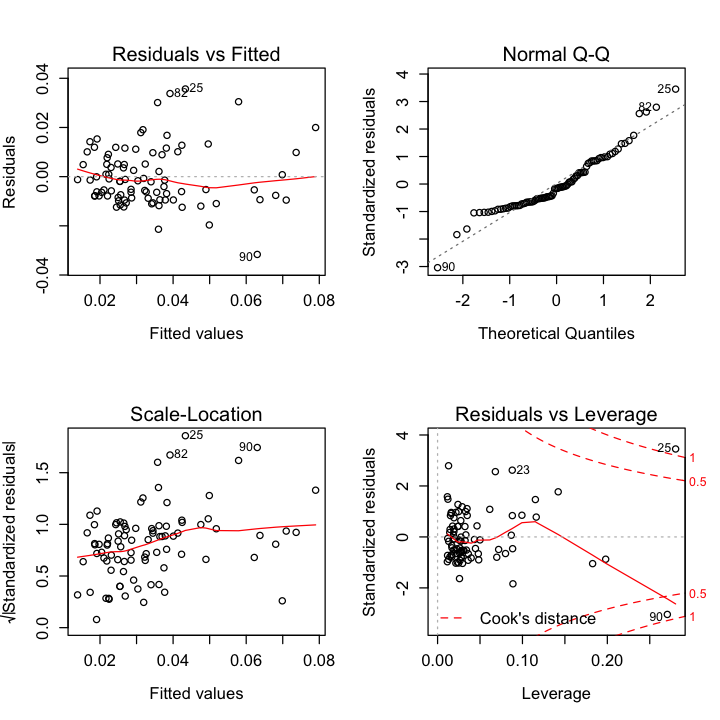

In [75]:
options(repr.plot.height = 6, repr.plot.width = 6, repr.plot.pointsize = 10)
par(mfrow = c(2,2))
plot(model.1.1)

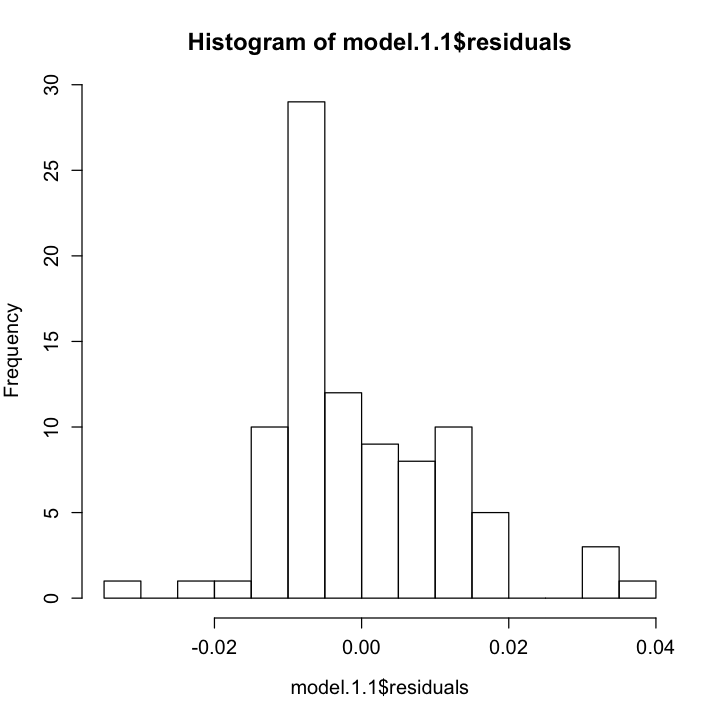

In [76]:
hist(model.1.1$residuals, breaks = 10)

# Model V2

$$crmrte \sim \beta_0 + \beta_1log(density +1) + \beta_2polpc + \beta_3wfed + \beta_4pctymle  + \beta_5prbconv + e$$

Our second model includes the same covariates as the first, as well as pctymle and prbconv. We believe these additional variables will increase the accuracy of our results without introducing substantial bias. As a rule of thumb, the variables we choose to include for model 2 are based on them having a having a correlation with crmrte that is higher than 0.34 in absolute value. 

These variables included prbarr, pctymle, prbconv, wcon, wloc, and wmfg. We cross reference these variables to check for any potential multicollinearity concerns with previous regressors. Seeing that the three wage variables are relatively highly correlated with wfed (all have correlation above 0.5), we chose to not include these variables in Model 2. These variables are associated with crime, but may not necessarily cause crime in and of themselves.

In addition, upon looking at the prbarr data, we notice that one datapoint is greater than 1, which doesn’t make sense. Assuming this is a transcription error, we subtract this probability value by 1, and then reproduce the correlation between crmrte and prbarr, and observe that it equals -.28. Seeing that the correlation decreased, we decide to not include it. We decide to include pctymle and prbconv in Model 2 and that they don’t require any transformations.

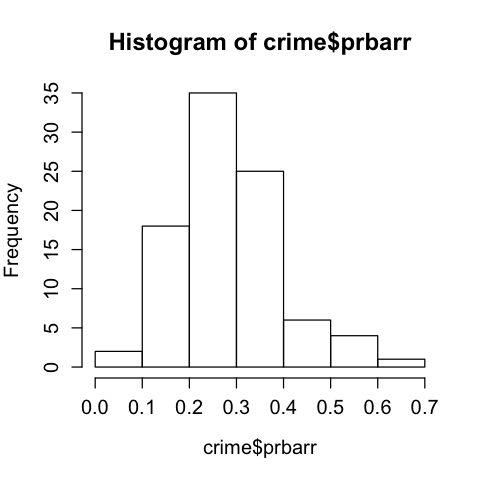

In [77]:
options(repr.plot.height = 4, repr.plot.width = 4, repr.plot.pointsize = 10)
hist(crime$prbarr)

In [84]:
examined.cols <- c('log.density', 'density', 'polpc', 'urban', 'wfed')
round(cor(crime[,!names(crime) %in% examined.cols], method = 'spearman')[, 'crmrte'], 2)

crmrte   prbarr  prbconv  prbpris   avgsen    taxpc     west  central 
    1.00    -0.28    -0.35     0.00     0.09     0.22    -0.40     0.19 
pctmin80     wcon     wtuc     wtrd     wfir     wser     wmfg     wsta 
    0.29     0.38     0.21     0.32     0.21     0.31     0.46     0.11 
    wloc      mix  pctymle 
    0.37     0.03     0.34

In [85]:
new.cols <- c('prbconv', 'wcon', 'wmfg', 'wloc', 'pctymle')
round(cor(crime)[new.cols, examined.cols[examined.cols != 'urban']], 2)

,log.density,density,polpc,wfed
prbconv,-0.29,-0.30,-0.03,0.02
wcon,0.49,0.45,-0.02,0.51
wmfg,0.46,0.44,0.27,0.51
wloc,0.48,0.45,0.38,0.52
pctymle,0.18,0.12,0.05,-0.06


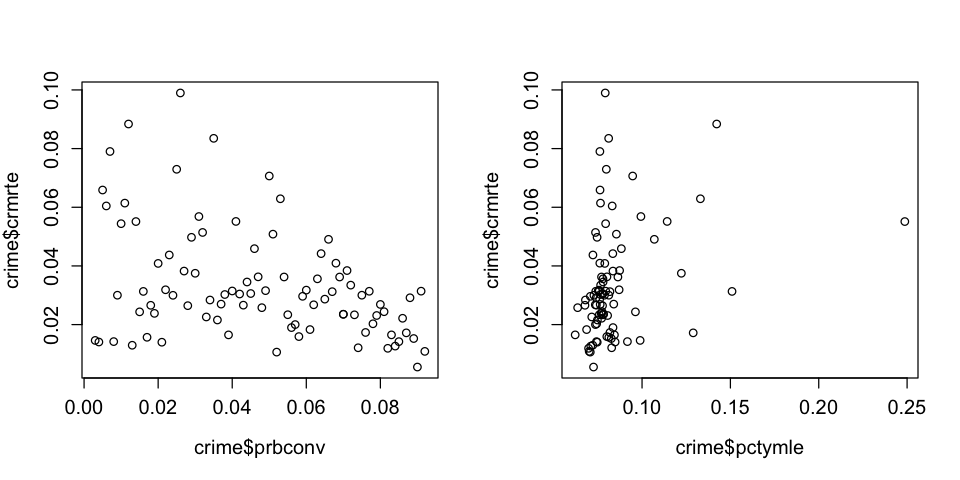

In [86]:
options(repr.plot.height = 4, repr.plot.width = 8, repr.plot.pointsize = 10)
par(mfrow = c(1, 2))
plot(crime$prbconv, crime$crmrte)
plot(crime$pctymle, crime$crmrte)

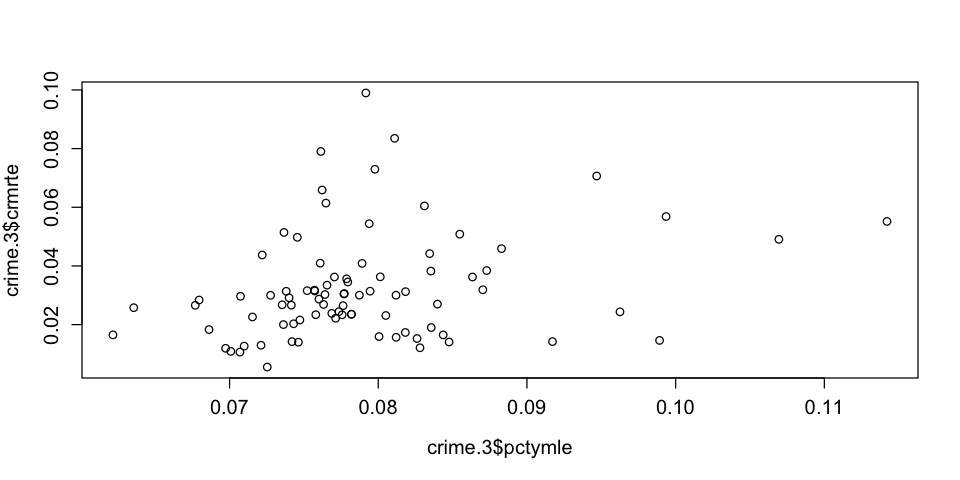

In [87]:
##In this code we show the plot for crime rate on percent youth male, omitting the outlier
crime.3 <- crime[crime$pctymle < 0.12,]
plot(crime.3$pctymle, crime.3$crmrte)

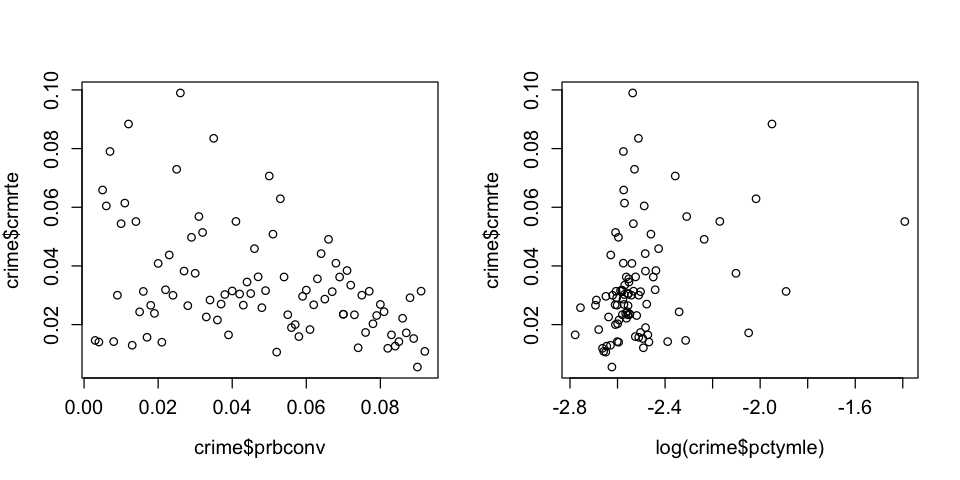

In [88]:
options(repr.plot.height = 4, repr.plot.width = 8, repr.plot.pointsize = 10)
par(mfrow = c(1, 2))
plot(crime$prbconv, crime$crmrte)
plot(log(crime$pctymle), crime$crmrte)

## Model 2 Results

Adjusted R^2: 0.6073. <br>
Our transformed density variable is statistically significant at the 0.1% level, our cleaned polpc variable is statistically significant at the 1% level, and our prbconv variable statistically significant at the 5% level.

Upon first viewing the Residuals vs. Leverage plot, the Cook’s distance line now visibly suggests that datapoint #25 may indeed be an outlier in addition to datapoint #51, which we have previously removed. We decide to remove datapoint #25 from model 2 as well. 

Reproducing our model and its results, we observe the following: <br>
Adjusted R^2 increases to 0.65 <br>
Our transformed density variable is statistically significant at the 0.1% level, our cleaned polpc variable is statistically significant at the 1% level, and our prbconv variable is statistically significant at the 5% level.

In [89]:
model.2 <- lm(crmrte ~ log(density+1) + polpc + wfed + prbconv + pctymle, data = crime[-c(51),])
summary(model.2)


Call:
lm(formula = crmrte ~ log(density + 1) + polpc + wfed + prbconv + 
    pctymle, data = crime[-c(51), ])

Residuals:
      Min        1Q    Median        3Q       Max 
-0.025905 -0.008063 -0.001724  0.007358  0.037084 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -1.211e-02  1.279e-02  -0.947  0.34654    
log(density + 1)  2.170e-02  4.181e-03   5.190 1.44e-06 ***
polpc             6.611e+00  2.236e+00   2.957  0.00404 ** 
wfed              3.257e-05  2.959e-05   1.101  0.27410    
prbconv          -1.115e-01  5.350e-02  -2.084  0.04019 *  
pctymle           1.091e-01  5.608e-02   1.946  0.05496 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01171 on 84 degrees of freedom
Multiple R-squared:  0.6293,	Adjusted R-squared:  0.6073 
F-statistic: 28.52 on 5 and 84 DF,  p-value: < 2.2e-16


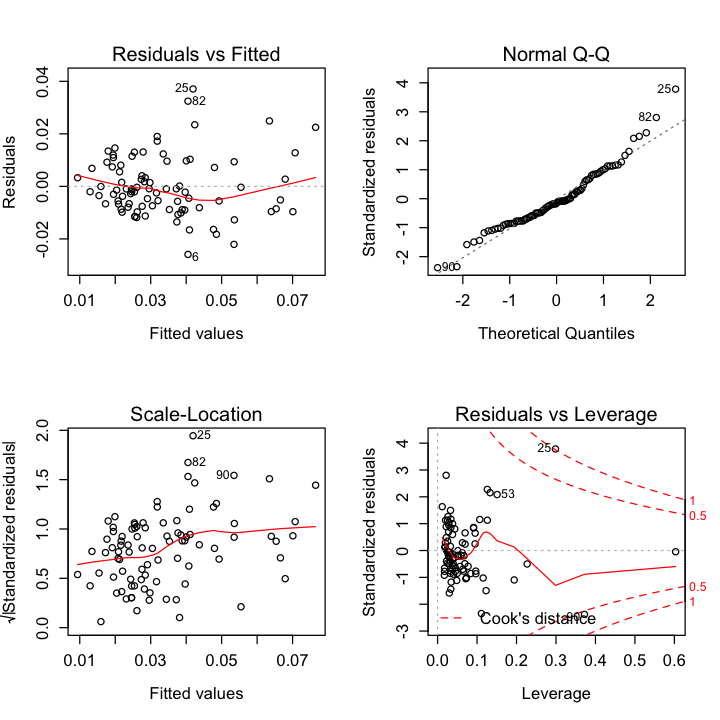

In [90]:
options(repr.plot.height = 6, repr.plot.width = 6, repr.plot.pointsize = 10)
par(mfrow = c(2,2))
plot(model.2)

In [92]:
model.2.2 <- lm(crmrte ~ log.density + polpc + wfed + prbconv + pctymle, data = crime[-c(51,25),])
summary(model.2.2)


Call:
lm(formula = crmrte ~ log.density + polpc + wfed + prbconv + 
    pctymle, data = crime[-c(51, 25), ])

Residuals:
      Min        1Q    Median        3Q       Max 
-0.017499 -0.007936 -0.002166  0.007337  0.033590 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.038e-02  1.189e-02  -1.714  0.09033 .  
log.density  2.275e-02  3.839e-03   5.925 6.86e-08 ***
polpc        1.868e+00  2.349e+00   0.795  0.42882    
wfed         5.776e-05  2.779e-05   2.078  0.04078 *  
prbconv     -9.574e-02  4.917e-02  -1.947  0.05491 .  
pctymle      1.408e-01  5.195e-02   2.709  0.00819 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01073 on 83 degrees of freedom
Multiple R-squared:  0.6705,	Adjusted R-squared:  0.6506 
F-statistic: 33.77 on 5 and 83 DF,  p-value: < 2.2e-16


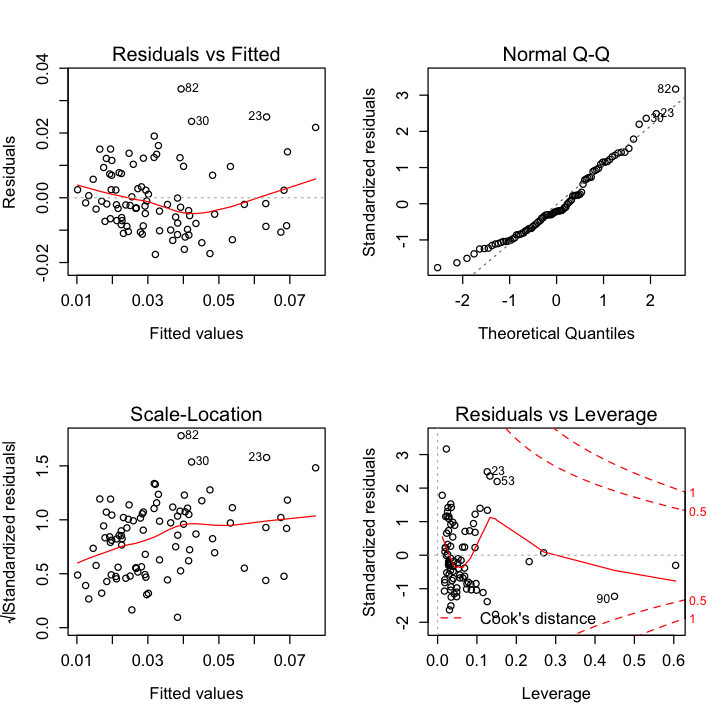

In [93]:
options(repr.plot.height = 6, repr.plot.width = 6, repr.plot.pointsize = 10)
par(mfrow = c(2,2))
plot(model.2.2)

# Model V3

$crmrte \sim \beta_0 + \beta_1log(density +1) + \beta_2polpc + \beta_3wfed + \beta_4pctymle  + \beta_5prbconv + \beta_6prbarr + \beta_7prbpris + \beta_8avgsen + \beta_9taxpc + \beta_{10}west + \beta_{11}central + \beta_{12}urban + \beta_{13}pctmin80 + \beta_{14}wcon + \beta_{15}wtuc + \beta_{16}wtrd + \beta_{17}wfir + \beta_{18}wser + \beta_{19}wmfg + \beta_{20}wsta + \beta_{21}wloc + \beta_{22}mix + e$

Our third model includes all covariates in the dataset. For data cleaning purposes, we continue to remove datapoints #25 and #51 throughout this model.

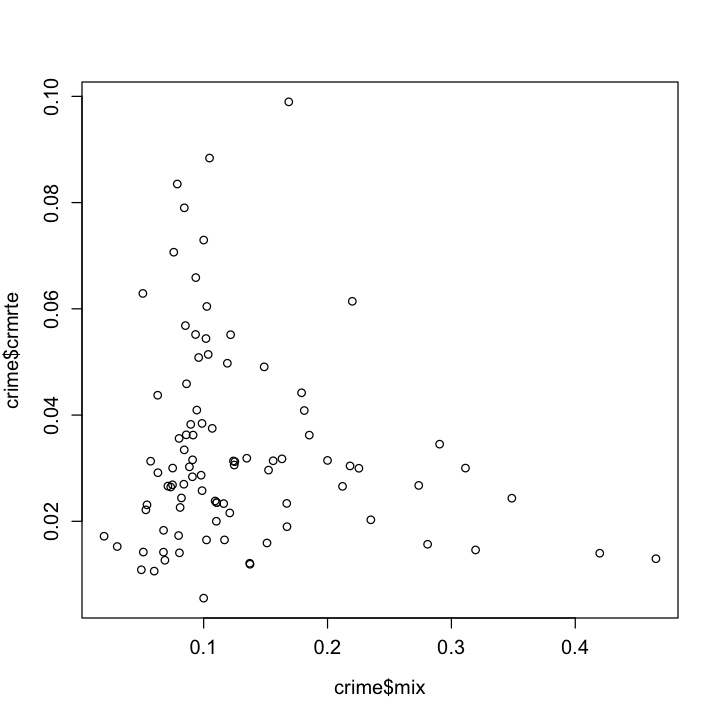

In [94]:
plot(crime$mix, crime$crmrte)

## Model 3 Results

Our new Adjusted R^2: .8118. <br>
Our prbarr, pctmin80, and transformed density variables are statistically significant at the 0.1% level. Our prbconv variable is statistically significant at the 1% level. Our avgsen, wser, and pctymle variables are statistically significant at the 5% level.

Our residuals vs. fitted plot for model 3 seems to be more pronounced in its parabolic shape than it had been for models 1 and 2.


In [ ]:
crime.2 <-  crime[ ,!names(crime) %in% c('density')]
model.3 <- lm(crmrte ~ ., data  = crime.2[-c(25,51),])
summary(model.3)

In [ ]:
options(repr.plot.height = 6, repr.plot.width = 6, repr.plot.pointsize = 10)
par(mfrow = c(2,2))
plot(model.3)

# Omitted Variables



We believe our models may suffer from OVB from covariates that are not available in the given dataset. We identify and elaborate on these concerns individually in the below discussion:

### Density
Our density variable measures total county population divided by the size of the county, but does not account for the distribution of density within the county. In addition to this density variable, it would be helpful to have an intra-county density distribution gini-coefficient variable. Having access to this variable would better inform policy at the county level.

The direction of this OVB is upwards, large and away from 0.
Highly dense areas within a county would increase the density metric for a county, thereby biasing our beta term upwards. 
Since our beta associated with density is positive, an upward bias would imply that bias is away from 0. There are no close proxies for this density metric.

### Percent Youth Male

We believe the pctymle variable may suffer from OVB because it doesn’t account for age nor gender distribution in a county. As such, an average or median age variable and/or gender variable would be helpful in understanding the roles that age and gender demographics play in crime rates. Perhaps an interaction term between average age and gender would be appropriate. 

The direction of this OVB is upwards, small, and away from 0. Intuitively, a higher percentage of young males in a county may be associated with a higher crime rate, thereby biasing our beta term upwards. Since our beta associated with density is positive, an upward bias would imply that bias is away from 0.

### Wage Variables

Our various wage variables may suffer from OVB because they don’t account for other metrics of economic opportunity, such as unemployment rates and income inequality in a given county. As such, the county’s unemployment rate and income inequality gini coefficient could be helpful to include in a model.

Considering that some of the wage variables in model 3 have a negative effect on crime rates, and that some have a positive effect, it is difficult to determine the direction and magnitude of OVB.
There are no close proxies for these wage metrics in the dataset.

### Police per Capita

The polpc variable may suffer from OVB as an inadequate metric for the relationship between police and the residents of the county. As such, an “attitude towards police” variable would be appropriate here. It addition, it would be interesting to compare this variable with a “attitude of police officers towards their county” variable.

The direction of this OVB is upwards, large and away from 0. A large police presence in a given county could be in response to high crime rates. However, this notion doesn’t capture the nature of the relationship between the police and its residents. Moreover, a large police presence could result in more opportunity of crimes being caught. This would thereby indicate a positive, upwards bias away from 0.

### Offense Mix

Our offense mix variable would suffer from OVB because the ratio of face to face crimes may not be an adequate metric in explaining increases of crime. To elaborate, some face to face crimes includes those of a violent or sexual nature, which are more sporadic and less attributable to societal structures. Furthermore, we believe that a metric of crime which is more attuned to the ratio of crimes that are economic in nature (such as robbery and theft) is more appropriate for this model. 

# Model Summaries

In [ ]:
install.packages('stargazer')

In [ ]:
library('stargazer')

In [ ]:
?stargazer

In [ ]:
stargazer(model.1.1, model.2.2, model.3, type = "text", omit.stat = "f",
          star.cutoffs = c(0.05, 0.01, 0.001))


# Recommendations